In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import Adam
import keras,os
import numpy as np
import matplotlib.pyplot as plt

                                 Training Data Sample


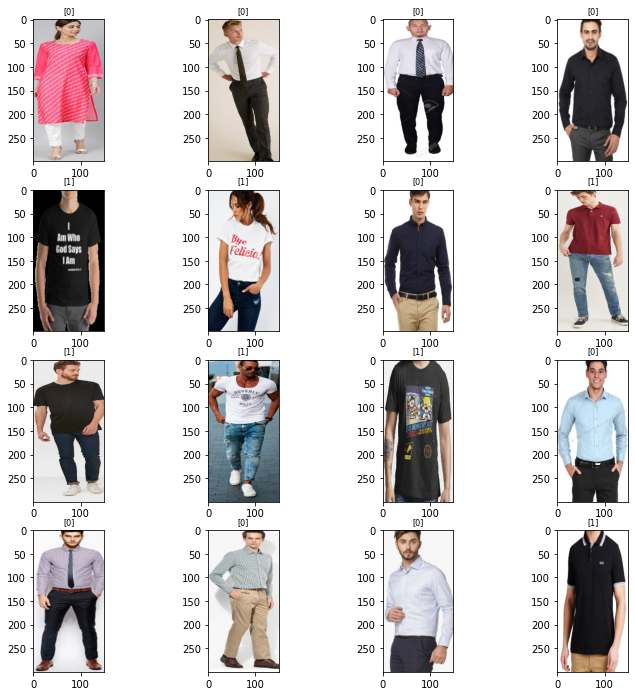

In [26]:
import cv2
imgs = []
for file in os.listdir("/home/uchiha/Desktop/Dress_code/Dress_code_classifier_model/croped/train/formal")[:4]:
    img = cv2.imread("/home/uchiha/Desktop/Dress_code/Dress_code_classifier_model/croped/train/formal/"+str(file))
    img = cv2.resize(img,(150,300))
    imgs.append([img[:,:,::-1],0])

for file in os.listdir("/home/uchiha/Desktop/Dress_code/Dress_code_classifier_model/croped/train/informal")[:2]:
    img = cv2.imread("/home/uchiha/Desktop/Dress_code/Dress_code_classifier_model/croped/train/informal/"+str(file))
    img = cv2.resize(img,(150,300))
    imgs.append([img[:,:,::-1],1])

for file in os.listdir("/home/uchiha/Desktop/Dress_code/Dress_code_classifier_model/croped/train/formal")[4:5]:
    img = cv2.imread("/home/uchiha/Desktop/Dress_code/Dress_code_classifier_model/croped/train/formal/"+str(file))
    img = cv2.resize(img,(150,300))
    imgs.append([img[:,:,::-1],0])
    
for file in os.listdir("/home/uchiha/Desktop/Dress_code/Dress_code_classifier_model/croped/train/informal")[2:6]:
    img = cv2.imread("/home/uchiha/Desktop/Dress_code/Dress_code_classifier_model/croped/train/informal/"+str(file))
    img = cv2.resize(img,(150,300))
    imgs.append([img[:,:,::-1],1])

for file in os.listdir("/home/uchiha/Desktop/Dress_code/Dress_code_classifier_model/croped/train/formal")[5:9]:
    img = cv2.imread("/home/uchiha/Desktop/Dress_code/Dress_code_classifier_model/croped/train/formal/"+str(file))
    img = cv2.resize(img,(150,300))
    imgs.append([img[:,:,::-1],0])

for file in os.listdir("/home/uchiha/Desktop/Dress_code/Dress_code_classifier_model/croped/train/informal")[6:10]:
    img = cv2.imread("/home/uchiha/Desktop/Dress_code/Dress_code_classifier_model/croped/train/informal/"+str(file))
    img = cv2.resize(img,(150,300))
    imgs.append([img[:,:,::-1],1])
    
_, axs = plt.subplots(4, 4, figsize=(12, 12))
axs = axs.flatten()

for img, ax in zip(imgs, axs):
    ax.imshow(img[0])
    ax.set_title("["+str(img[1])+"]",fontsize = 8)
print("                                 Training Data Sample")
plt.show()

                                 Testing Data Sample


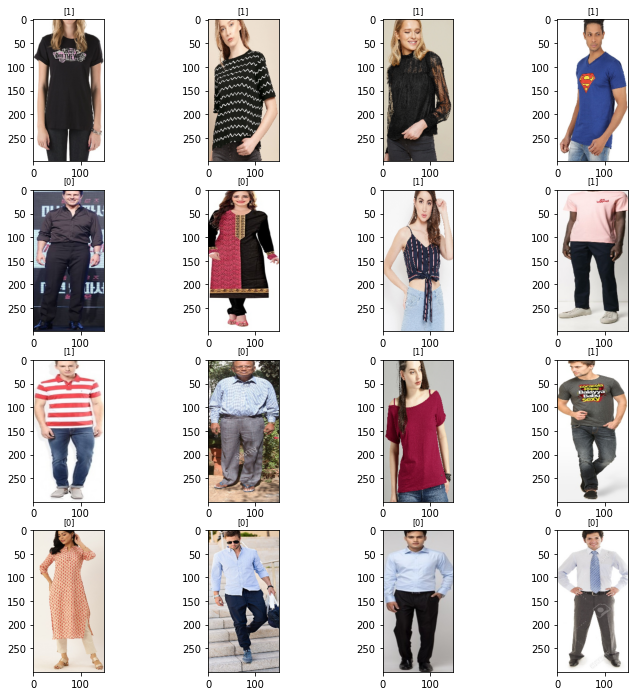

In [25]:
import cv2
imgs = []

for file in os.listdir("/home/uchiha/Desktop/Dress_code/Dress_code_classifier_model/croped/test/informal")[100:104]:
    img = cv2.imread("/home/uchiha/Desktop/Dress_code/Dress_code_classifier_model/croped/test/informal/"+str(file))
    img = cv2.resize(img,(150,300))
    imgs.append([img[:,:,::-1],1])

for file in os.listdir("/home/uchiha/Desktop/Dress_code/Dress_code_classifier_model/croped/test/formal")[105:107]:
    img = cv2.imread("/home/uchiha/Desktop/Dress_code/Dress_code_classifier_model/croped/test/formal/"+str(file))
    img = cv2.resize(img,(150,300))
    imgs.append([img[:,:,::-1],0])

for file in os.listdir("/home/uchiha/Desktop/Dress_code/Dress_code_classifier_model/croped/test/informal")[3:6]:
    img = cv2.imread("/home/uchiha/Desktop/Dress_code/Dress_code_classifier_model/croped/test/informal/"+str(file))
    img = cv2.resize(img,(150,300))
    imgs.append([img[:,:,::-1],1])

for file in os.listdir("/home/uchiha/Desktop/Dress_code/Dress_code_classifier_model/croped/test/formal")[4:5]:
    img = cv2.imread("/home/uchiha/Desktop/Dress_code/Dress_code_classifier_model/croped/test/formal/"+str(file))
    img = cv2.resize(img,(150,300))
    imgs.append([img[:,:,::-1],0])

for file in os.listdir("/home/uchiha/Desktop/Dress_code/Dress_code_classifier_model/croped/test/informal")[20:22]:
    img = cv2.imread("/home/uchiha/Desktop/Dress_code/Dress_code_classifier_model/croped/test/informal/"+str(file))
    img = cv2.resize(img,(150,300))
    imgs.append([img[:,:,::-1],1])
    

for file in os.listdir("/home/uchiha/Desktop/Dress_code/Dress_code_classifier_model/croped/test/formal")[5:10]:
    img = cv2.imread("/home/uchiha/Desktop/Dress_code/Dress_code_classifier_model/croped/test/formal/"+str(file))
    img = cv2.resize(img,(150,300))
    imgs.append([img[:,:,::-1],0])


_, axs = plt.subplots(4, 4, figsize=(12, 12))
axs = axs.flatten()

for img, ax in zip(imgs, axs):
    ax.imshow(img[0])
    ax.set_title("["+str(img[1])+"]",fontsize = 8)
print("                                 Testing Data Sample")
plt.show()

In [2]:
h = 300
w = 150
    
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=( h, w,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))

# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(2,activation='softmax'))

# model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])


# opt = Adam(lr=0.005)
model.compile(optimizer="adam", loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])


In [3]:
batch_size = 10

train_datagen = ImageDataGenerator(horizontal_flip=True,brightness_range=[0.3,1.0],width_shift_range=[-10,10],height_shift_range=[0,20])
test_datagen = ImageDataGenerator(horizontal_flip=True,brightness_range=[0.3,1.0],width_shift_range=[-10,10],height_shift_range=[0,20])


train_generator = train_datagen.flow_from_directory('croped/train', target_size=(h, w),batch_size=batch_size,color_mode="grayscale") 
validation_generator = test_datagen.flow_from_directory('croped/test',target_size=(h, w),batch_size=batch_size,color_mode="grayscale")

print(train_generator.samples)
print(validation_generator.samples)
print(train_generator.class_indices)

Found 1360 images belonging to 2 classes.
Found 244 images belonging to 2 classes.
1360
244
{'formal': 0, 'informal': 1}


In [4]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // batch_size)


model.save('models/version5.h5')  # always save your weights after training or during trainin


/home/uchiha/ObjectDetectionEnv/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
136/136 [==============================] - 44s 319ms/step - loss: 52.1146 - accuracy: 0.5649 - val_loss: 0.6038 - val_accuracy: 0.6542
Epoch 2/50
136/136 [==============================] - 40s 296ms/step - loss: 0.6077 - accuracy: 0.6989 - val_loss: 0.5880 - val_accuracy: 0.6875
Epoch 3/50
136/136 [==============================] - 40s 290ms/step - loss: 0.5868 - accuracy: 0.6874 - val_loss: 0.5827 - val_accuracy: 0.6542
Epoch 4/50
136/136 [==============================] - 41s 302ms/step - loss: 0.5527 - accuracy: 0.7160 - val_loss: 0.6516 - val_accuracy: 0.6792
Epoch 5/50
136/136 [==============================] - 41s 304ms/step - loss: 0.5251 - accuracy: 0.7481 - val_loss: 0.5813 - val_accuracy: 0.7208
Epoch 6/50
136/136 [==============================] - 41s 298ms/step - loss: 0.5082 - accuracy: 0.7480 - val_loss: 0.5505 - val_accuracy: 0.7042
Epoch 7/50
136/136 [==============================] - 41s 297ms/step - loss: 0.5000 - accuracy: 0.7775 - val_loss: 0.5554 - val_a

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


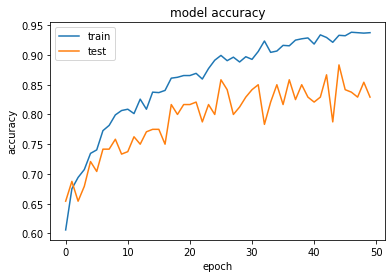

In [5]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

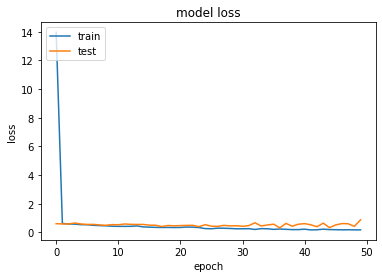

In [6]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()